# Using [International Brain Laboratory](https://www.internationalbrainlab.com/) behavior data for an example analysis

Christopher S Krasniak, Cold Spring Harbor Laboratory, 2020-01-22

In order to encourage access and use the IBL data used for and released with the [bioRxiv](https://www.biorxiv.org/content/10.1101/2020.01.17.909838v2) paper detailing the standardized training of the IBL, the Outreach Working Group of the IBL created this tutorial. The purpose of this document is to encourage the use of IBL data, specifically as a resource for teaching the use of python for the analysis of neuroscience and psychology data. Many simple data analysis questions can be explored with this data set, a few examples of which are in the accompanying document DOCUMENT. We hope these questions will help future neuroscientists and psychologists explore this dataset and perhaps make their own unique discoveries as they learn to use python for data analysis.

To proceed with the tutorial, make sure you have completed the installation steps in the [README](https://github.com/cskrasniak/behavior_analysis_demo/blob/master/README.md)

What follows is a tutorial that can be used as an example of how to access the IBL data and perform a simple analysis to answer a simple question. The data used in this tutorial are from mice that have been trained on a basic visual detection task, please read the [paper](https://www.biorxiv.org/content/10.1101/2020.01.17.909838v2) to understand the dataset you will be working with.

## Question: Who performs more trials, male or female mice?

### Import packages
The first step, as with any python code, is to import all of the packages we will need to work with the data, this is a good set to start with when working with IBL data. You may need more or fewer for specific questions, but this is a good start.

In [136]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datajoint as dj
import os
import matplotlib as mpl
from ibl_pipeline import action, subject, behavior, acquisition
from paper_behavior_functions import query_sessions

### Fetch the data we'll need
Now that that's all setup, the next thing we have to do is retrieve the data from the database. To do that we will be using [DataJoint](https://docs.datajoint.io/python/), we will be running queries that will return the data we are looking for, queries in DataJoint are run using mySQL syntax. Read more about DataJoint in the link above, and the IBL Data Architecture [here](https://www.biorxiv.org/content/10.1101/827873v1). If you are going to be running your own analyses, it will be useful to familarize yourself with using datajoint with specific tutorials on [using datajoint with IBL data](https://github.com/int-brain-lab/IBL-pipeline/tree/master/notebooks/notebooks_tutorial/202001_behavior_paper).

Included in the _simple_analysis_demo_ folder is the list of universially unique identifiers (UUIDs) of the mice we will use to answer our question, and we already imported a function `query_sessions` (last line above) to query the sessions that we will use data from.

To compare sex of mouse with how many trials they completed, we need to know how many trials there were in a session, and if the mice were male or female. I'll show you where we can find this.

In [2]:
## The describe method is handy for datajoint objects, it lets you know what type of data is in what object
behavior.TrialSet.describe()  # the number of trials completed per session is in behavior.TrialSet

# information about behavioral trials
-> acquisition.Session
---
n_trials             : int                          # total trial numbers in this set
n_correct_trials=null : int                          # number of the correct trials
trials_start_time    : float                        # start time of the trial set (seconds)
trials_end_time      : float                        # end time of the trial set (seconds)



'# information about behavioral trials\n-> acquisition.Session\n---\nn_trials             : int                          # total trial numbers in this set\nn_correct_trials=null : int                          # number of the correct trials\ntrials_start_time    : float                        # start time of the trial set (seconds)\ntrials_end_time      : float                        # end time of the trial set (seconds)\n'

In [3]:
subject.Subject.describe()  # the sex of the mouse is in subject.Subject


subject_uuid         : uuid                         
---
subject_nickname     : varchar(255)                 # nickname
sex                  : enum('M','F','U')            # sex
subject_birth_date=null : date                         # birth date
ear_mark=null        : varchar(255)                 # ear mark
-> [nullable] subject.Line.proj(subject_line="line_name")
-> [nullable] subject.Source.proj(subject_source="source_name")
protocol_number      : tinyint                      # protocol number
subject_description=null : varchar(1024)                
subject_ts=CURRENT_TIMESTAMP : timestamp                    



'subject_uuid         : uuid                         \n---\nsubject_nickname     : varchar(255)                 # nickname\nsex                  : enum(\'M\',\'F\',\'U\')            # sex\nsubject_birth_date=null : date                         # birth date\near_mark=null        : varchar(255)                 # ear mark\n-> [nullable] subject.Line.proj(subject_line="line_name")\n-> [nullable] subject.Source.proj(subject_source="source_name")\nprotocol_number      : tinyint                      # protocol number\nsubject_description=null : varchar(1024)                \nsubject_ts=CURRENT_TIMESTAMP : timestamp                    \n'

Now that we know where the information is, we can combine it and retrieve the data.

In [4]:
data_to_fetch =  behavior.TrialSet * subject.Subject
data_to_fetch

subject_uuid,session_start_time start time,n_trials total trial numbers in this set,n_correct_trials number of the correct trials,trials_start_time start time of the trial set (seconds),trials_end_time end time of the trial set (seconds),subject_nickname nickname,sex sex,subject_birth_date birth date,ear_mark ear mark,subject_line name,subject_source name of source,protocol_number protocol number,subject_description,subject_ts
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-10 11:24:59,196,72,0.0,2764.65,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-12 09:21:03,140,56,0.0,2775.9,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-13 10:28:45,223,91,0.0,3265.18,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 09:37:17,55,22,0.0,1306.78,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-14 11:35:16,289,134,0.0,2759.22,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-15 10:29:21,141,60,0.0,2713.52,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-16 17:00:11,340,159,0.0,2692.64,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-19 09:12:02,224,95,0.0,2688.67,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-20 12:06:48,252,111,0.0,2915.64,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33
00778394-c956-408d-8a6c-ca3b05a611d5,2019-08-21 11:21:03,269,85,0.0,2701.59,KS019,F,2019-06-18,None,C57BL/6J,None,2,None,2019-08-13 17:07:33


In [14]:
## Fetch the data as a pandas dataframe 
# There's a lot of extraneous info in there, so we'll only fetch the interesting data types listed below
data = data_to_fetch.fetch('subject_uuid','n_trials','n_correct_trials','trials_end_time','sex',as_dict=True)  
data = pd.DataFrame(data)
data

,subject_uuid,n_trials,n_correct_trials,trials_end_time,sex
0,00778394-c956-408d-8a6c-ca3b05a611d5,196,72,2764.65,F
1,00778394-c956-408d-8a6c-ca3b05a611d5,140,56,2775.90,F
2,00778394-c956-408d-8a6c-ca3b05a611d5,223,91,3265.18,F
3,00778394-c956-408d-8a6c-ca3b05a611d5,55,22,1306.78,F
4,00778394-c956-408d-8a6c-ca3b05a611d5,289,134,2759.22,F
...,...,...,...,...,...
13932,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,1155,757,5703.48,U
13933,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,902,644,4495.77,U
13934,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,821,551,4386.03,U
13935,ffcd8c5e-fe0c-4d6d-8418-d9152f1746f1,427,328,3130.53,U


In [23]:
## Let's make sure we only have male (M) and female(F) mice
for mouse_sex in data['sex']:
    if mouse_sex != 'M' and mouse_sex != 'F':
        print(mouse_sex) 

U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U
U


It looks like there are some sessions when something went wrong and the mouse's sex is marked as unknown (U) so we should probably just exclude those sessions.

In [17]:
mf_data = data[data['sex']!='U']


,subject_uuid,n_trials,n_correct_trials,trials_end_time,sex
0,00778394-c956-408d-8a6c-ca3b05a611d5,196,72,2764.65,F
1,00778394-c956-408d-8a6c-ca3b05a611d5,140,56,2775.90,F
2,00778394-c956-408d-8a6c-ca3b05a611d5,223,91,3265.18,F
3,00778394-c956-408d-8a6c-ca3b05a611d5,55,22,1306.78,F
4,00778394-c956-408d-8a6c-ca3b05a611d5,289,134,2759.22,F
...,...,...,...,...,...
13896,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,415,305,2958.71,M
13897,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,470,293,5347.38,M
13898,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,509,321,3770.27,M
13899,fdfa9a26-75fd-49c4-a4ed-1768cfd861ca,456,311,3797.27,M


In [24]:
## Let's double check to make sure we only have M and F
for mouse_sex in mf_data['sex']:
    if mouse_sex != 'M' and mouse_sex != 'F':
        print("We've got a third sex!") 

OK, looks like we've only got males and females now, lets first just take a quick look to get an idea if males or females do more trials. To do this we will just take the average trial number for all the male mice and the same for the female mice and print them out.

In [39]:
females = mf_data['sex'] == 'F'  # get a boolean array for if a mouse is female
males = ~females  # males are all mice that aren't females
nTrials_females = mf_data[females]['n_trials']  # first use females to restrict all the data down to females, then only take the n_trials column
nTrials_males = mf_data[males]['n_trials']
mean_f = np.mean(nTrials_females)  # python doesn't have built in functions for mean, so we are using one from numpy which we imported above
mean_m = np.mean(nTrials_males)

In [40]:
print(mean_f)
print(mean_m)

594.1882301080009
664.0141843971631


It looks like the males do slightly more trials than the females! This is just a first glance though, we should be a bit more rigorous and get some measure of the variability within each of these groups. maybe we can run some simple statistics on them too.

In [53]:
se_females = sp.stats.sem(nTrials_females)  # using the function for standard error from scipy imported above, specifically the stats package within scipy
se_males = sp.stats.sem(nTrials_males)
t, p = sp.stats.ttest_ind(nTrials_females, nTrials_males)  # calculating the t-stat and p-value from scipy 
print(se_females, se_males, t, p)

4.295933506115947 3.558671093409448 -12.061957721506097 2.5270409715068296e-33


WOW! Looks like they are definitely significantly different. Lets plot this in a simple bar graph to visualize it a bit better

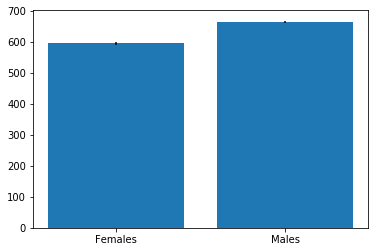

In [76]:
plt.bar(['Females','Males'],[mean_f,mean_m,], yerr=[se_females,se_males])  # bar function
plt.show()


Though the difference isn't large, it seems like if you look at all sessions, female mice perform significantly fewer trials than male mice. However I'm not too convinced that lumping all the sessions together is the best way to compare this data. It might be more informative to get one mean for each mouse, then to compare how many trials a given mouse does and separate based on if that mouse is male or female.

In [78]:
## first lets get a list of the mice that we have data from
mouse_list = np.unique(mf_data['subject_uuid'])
print(len(mouse_list))

291


In [105]:
## now lets get a mean number of trials for each mouse
mouse_means = np.empty(len(mouse_list))  # initialize an array to put in our averages
mouse_sexes = []  # strings are easier to just use lists with, want a matching list for who is male who is female
for i in range(len(mouse_list)):
    mouse_means[i] = np.mean(mf_data[mf_data['subject_uuid']==mouse_list[i]]['n_trials'])  # complicated indexing here, try to work out why it works
    mouse_sexes.append(np.unique(mf_data[mf_data['subject_uuid']==mouse_list[i]]['sex'])[0])  # unique to just take one 'M' or 'F' and the [0] at the end becasue np.unique returns an array but we just want the letter

526.5718561290377 619.6975007590846 18.722223328819965 15.163133922890086 -3.80412662407398 0.00017367509186132715


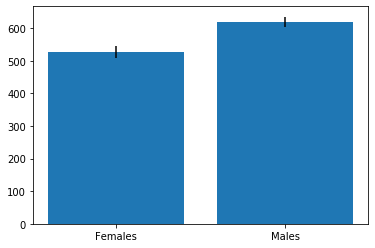

In [119]:
## lets seperate the males and females and redo our stats with these new numbers
female_mice = [i == 'F' for i in mouse_sexes]
male_mice = [i == 'M' for i in mouse_sexes]
male_means = mouse_means[male_mice]
female_means = mouse_means[female_mice]
male_grand_mean = np.mean(male_means)
female_grand_mean = np.mean(female_means)
se_male_means = sp.stats.sem(male_means)
se_female_means = sp.stats.sem(female_means)
t, p = sp.stats.ttest_ind(female_means,male_means)
print(female_grand_mean, male_grand_mean, se_female_means, se_male_means, t, p)


It looks like these are still significantly different when analyzed this way, lets plot this a little bit differently to get a better idea of the spread of different trial numbers this time

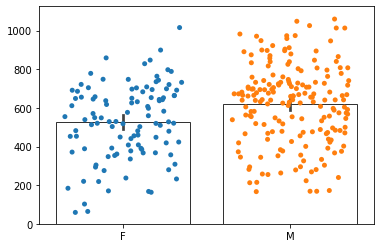

In [134]:
ax = sns.stripplot(x=mouse_sexes, y=mouse_means, jitter = .35)  # uses the seaborn package which plots mostly using raw values and looks quite nice
ax = sns.barplot(x=mouse_sexes, y=mouse_means, facecolor=(1,1,1,0), edgecolor='.2')  # plot a bar on top of the strip plot

*Congrats!* You finished this quick example of using the IBL behavior data. Don't stop here though, you can contrinue to work with this question if you want, there are plenty of ways to refine the simple analysis we have done here. See Below for a few more ideas of how to continue working on this question of if males and females perform different numbers of trials. Otherwise feel free to look at [this list]() for more analysis ideas, or to come up with more on your own!

### Continuing the male vs female analysis
It turns out that male mice tend to be a bit larger than female mice. Why might this matter? Because the mice are water-restricted they are thirsty, and the reward we give them is sugar water, you might think that the amount of sugar water reward that they are willing to drink is correlated to their body weight. Therefore female mice may just do fewer trials because they weigh less! How can we address this? One idea is to roughly weight-match the male and female mice. For example this would let you compare the number of trials a 25-27 gram male mouse completes to a female mouse in the same weight class. A slightly simpler way to do this would be to just normalize the number of trials each mouse does to its weight on that day.

In [144]:
## To do this you'll need the weighing information, that can be found in action.Weighing (action is imported above)
action.Weighing()


subject_uuid,weighing_time date time,weigh_uuid,weight weight,weighing_user username,weighing_ts
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-23 11:00:00,e9a8784d-f256-4418-b02d-dfc9e4179a74,23.81,valeria,2019-11-26 18:35:23
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-24 11:00:00,0eecdd85-694f-4c9a-859f-f9789101fffa,23.3,valeria,2019-11-26 18:25:47
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-25 11:00:00,ffb96da5-d5bf-47e0-9380-edaed4766546,23.77,valeria,2019-11-26 18:36:22
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-26 11:00:00,16cf3293-00b1-45df-8d43-f3fe7d8fd9f2,23.35,valeria,2019-11-26 18:26:07
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-27 11:00:00,b515e6a4-db2a-496f-b29d-de6f100f1df0,23.39,valeria,2019-11-26 18:33:03
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-30 11:00:00,95ff26dc-8c64-4c56-b852-ab6a21c9aac4,22.2,valeria,2019-11-26 18:31:41
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-07-31 11:00:00,4c1a2b3e-e0ba-4ae3-b091-ddf6ebe33f56,22.14,valeria,2019-11-26 18:28:27
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-08-01 11:00:00,40c82972-4ef2-4dd8-b8e0-9d1f7326dabc,22.24,valeria,2019-11-26 18:27:56
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-08-02 11:00:00,1d0063d1-2f56-4b52-ab21-287485444a22,22.12,valeria,2019-11-26 18:26:24
0026c82d-39e4-4c6b-acb3-303eb4b24f05,2018-08-03 11:00:00,56260863-d42d-49cb-95b4-40ea9fbf72d4,22.36,valeria,2019-11-26 18:28:52


In [150]:
## Use this box to fetch the weighings for the mice 
weighings = action.Weighing.fetch('subject_uuid','weighing_time','weight', as_dict='True')# use the fetch method to get the subject_uuid, weighing_time, and weight for all weighings and set as_dict=True
weighings = pd.DataFrame(weighings) # convert the dictionary to a pandas DataFrame

In [152]:
## Check to see if the length of weighings and mf_data (our dataset we made above) is the same
print(len(weighings))
print(len(mf_data))

22571
12997


There should be more weighings than behavior sessions (length of mf_data), so we are going to have to prune these down so that the dates match between weighings and sessions, so we know how much the mouse weighed for a given session. To do this we are going to have to convert the time to the day using the .date() method because the session and weighing likely happened at different times.